In [1]:
!pip install spacy

  Using cached spacy-3.4.1-cp39-cp39-win_amd64.whl (11.8 MB)
  Using cached thinc-8.1.0-cp39-cp39-win_amd64.whl (1.3 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached typer-0.4.2-py3-none-any.whl (27 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached pathy-0.6.2-py3-none-any.whl (42 kB)
  Using cached cymem-2.0.6-cp39-cp39-win_amd64.whl (36 kB)
  Using cached srsly-2.4.4-cp39-cp39-win_amd64.whl (450 kB)
  Using cached murmurhash-1.0.7-cp39-cp39-win_amd64.whl (18 kB)
  Using cached spacy_legacy-3.0.9-py2.py3-none-any.whl (20 kB)
  Using cached pydantic-1.9.1-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached preshed-3.0.6-cp39-cp39-win_amd64.whl (112 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached blis-0.7.8-cp39-cp39-win_amd64.whl (6.6 MB)
  Attempting uninstall: smart-open
    Found existing instal

In [2]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [3]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [4]:
# Import Data 
ts= pd.read_csv('C:/Users/LENOVO/Downloads/Reviews.csv',encoding='latin1')
ts

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
#Considered first 500 reviews

ts = ts.head(500)
print(ts.shape)

(500, 10)


In [6]:
# Consider only text column & remove rest all columns

ts.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'],inplace=True,axis=1)
ts

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13404\3225367917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'],inplace=True,axis=1)


,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
495,i rarely eat chips but i saw these and tried t...
496,This is easily the best potato chip that I hav...
497,Kettle Chips Spicy Thai potato chips have the ...
498,"Okay, I should not eat potato chips, nor shoul..."


# Text Preprocessing

In [7]:
ts=[Text.strip() for Text in ts.Text] # remove both the vvvv
ts=[Text for Text in ts if Text]  # removes empty strings, because they are considered in Python as False
ts[0:10]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

In [8]:
ts_text=' '.join(ts)

In [9]:
!pip install nltk

### NLTK is a standard python library with prebuilt functions and utilities for the ease of use and implementation. 
### It is one of the most used libraries for natural language processing and computational linguistics.

### Tokenization is the process of breaking text up into smaller chunks as per our requirements

In [10]:
#Tokenization 
    
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
ts_tokens=tknzr.tokenize(ts_text)
print(ts_tokens)

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', '.', 'Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', '...', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', '.', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', '"', 'Jumbo', '"', '.', 'This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', '.', 'It', 'is', 'a', 'light', ',', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', '-', 'in', 'this', 'case', 'Filberts', '.', 'And', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 

In [11]:
# Tokens count

len(ts_tokens)

40155

In [12]:
# Joining the list into one string/text

ts_tokens_text=' '.join(ts_tokens)
ts_tokens_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality . The product looks more like a stew than a processed meat and it smells better . My Labrador is finicky and she appreciates this product better than most . Product arrived labeled as Jumbo Salted Peanuts ... the peanuts were actually small sized unsalted . Not sure if this was an error or if the vendor intended to represent the product as " Jumbo " . This is a confection that has been around a few centuries . It is a light , pillowy citrus gelatin with nuts - in this case Filberts . And it is cut into tiny squares and then liberally coated with powdered sugar . And it is a tiny mouthful of heaven . Not too chewy , and very flavorful . I highly recommend this yummy treat . If you are familiar with the story of C . S . Lewis \' " The Lion , The Witch , and The Wardrobe " - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch . If you are lo

In [13]:
# Remove Punctuations

no_punc_text=ts_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality  The product looks more like a stew than a processed meat and it smells better  My Labrador is finicky and she appreciates this product better than most  Product arrived labeled as Jumbo Salted Peanuts  the peanuts were actually small sized unsalted  Not sure if this was an error or if the vendor intended to represent the product as  Jumbo   This is a confection that has been around a few centuries  It is a light  pillowy citrus gelatin with nuts  in this case Filberts  And it is cut into tiny squares and then liberally coated with powdered sugar  And it is a tiny mouthful of heaven  Not too chewy  and very flavorful  I highly recommend this yummy treat  If you are familiar with the story of C  S  Lewis   The Lion  The Witch  and The Wardrobe   this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch  If you are looking for the secret ingredie

In [14]:
# Remove https or url within text

import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality  The product looks more like a stew than a processed meat and it smells better  My Labrador is finicky and she appreciates this product better than most  Product arrived labeled as Jumbo Salted Peanuts  the peanuts were actually small sized unsalted  Not sure if this was an error or if the vendor intended to represent the product as  Jumbo   This is a confection that has been around a few centuries  It is a light  pillowy citrus gelatin with nuts  in this case Filberts  And it is cut into tiny squares and then liberally coated with powdered sugar  And it is a tiny mouthful of heaven  Not too chewy  and very flavorful  I highly recommend this yummy treat  If you are familiar with the story of C  S  Lewis   The Lion  The Witch  and The Wardrobe   this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch  If you are looking for the secret ingredie

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Tokenization

from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', 'Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', 'Jumbo', 'This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', 'It', 'is', 'a', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', 'in', 'this', 'case', 'Filberts', 'And', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'liberally', 'coated', 'with', 'powdered', 'sug

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Tokens count after removing Punctuations & https or url within text

len(text_tokens)

34341

In [19]:
#Importing Stop data

stop =pd.read_csv("C:/Users/LENOVO/Desktop/me/stop.txt")

### Stop words are words which occur frequently in a corpus. e.g a, an, the, in. 
### Frequently occurring words are removed from the corpus for the sake of text-normalization.(A corpus is essentially a collection of sentences which serves as an input)
### Also to reduce the dimension of a data set.

In [20]:
stop

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [21]:
# Remove Stopwords

from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

stoplist=stop.values.tolist()
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['bought', 'several', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'The', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'My', 'Labrador', 'finicky', 'appreciates', 'product', 'better', 'Product', 'arrived', 'labeled', 'Jumbo', 'Salted', 'Peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'Not', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'Jumbo', 'This', 'confection', 'around', 'centuries', 'It', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'Filberts', 'And', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'And', 'tiny', 'mouthful', 'heaven', 'Not', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'If', 'familiar', 'story', 'C', 'S', 'Lewis', 'The', 'Lion', 'The', 'Witch', 'The', 'Wardrobe', 'treat', 'seduces', 'Edmund', 'selling', 'Brother', 'Sisters', 'Witch', 'If', 'looking', 'secret', 'ingredient', 'Robitussin', 'believe', 'found', 'got', 'ad

In [22]:
#Stopword list

stoplist

[["a's"],
 ['able'],
 ['about'],
 ['above'],
 ['according'],
 ['accordingly'],
 ['across'],
 ['actually'],
 ['after'],
 ['afterwards'],
 ['again'],
 ['against'],
 ["ain't"],
 ['all'],
 ['allow'],
 ['allows'],
 ['almost'],
 ['alone'],
 ['along'],
 ['already'],
 ['also'],
 ['although'],
 ['always'],
 ['am'],
 ['among'],
 ['amongst'],
 ['an'],
 ['and'],
 ['another'],
 ['any'],
 ['anybody'],
 ['anyhow'],
 ['anyone'],
 ['anything'],
 ['anyway'],
 ['anyways'],
 ['anywhere'],
 ['apart'],
 ['appear'],
 ['appreciate'],
 ['appropriate'],
 ['are'],
 ["aren't"],
 ['around'],
 ['as'],
 ['aside'],
 ['ask'],
 ['asking'],
 ['associated'],
 ['at'],
 ['available'],
 ['away'],
 ['awfully'],
 ['b'],
 ['be'],
 ['became'],
 ['because'],
 ['become'],
 ['becomes'],
 ['becoming'],
 ['been'],
 ['before'],
 ['beforehand'],
 ['behind'],
 ['being'],
 ['believe'],
 ['below'],
 ['beside'],
 ['besides'],
 ['best'],
 ['better'],
 ['between'],
 ['beyond'],
 ['both'],
 ['brief'],
 ['but'],
 ['by'],
 ['c'],
 ["c'mon"],
 

In [23]:
#Show content without Stopwords

no_stop_tokens=[word for word in text_tokens if not word in stoplist]
print(no_stop_tokens)

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', 'Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', 'Jumbo', 'This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', 'It', 'is', 'a', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', 'in', 'this', 'case', 'Filberts', 'And', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'liberally', 'coated', 'with', 'powdered', 'sug

In [24]:
# Normalizing the data

lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['in', 'this', 'case', 'filberts', 'and', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'liberally', 'coated', 'with', 'powdered', 'sugar', 'and', 'it', 'is', 'a', 'tiny', 'mouthful', 'of', 'heaven', 'not', 'too', 'chewy', 'and', 'very', 'flavorful', 'i', 'highly', 'recommend', 'this', 'yummy', 'treat', 'if', 'you', 'are', 'familiar', 'with', 'the', 'story', 'of', 'c', 's', 'lewis', 'the', 'lion', 'the', 'witch', 'and', 'the', 'wardrobe', 'this', 'is', 'the', 'treat', 'that', 'seduces', 'edmund', 'into', 'selling', 'out', 'his', 'brother', 'and', 'sisters', 'to', 'the', 'witch', 'if', 'you', 'are', 'looking', 'for', 'the', 'secret', 'ingredient', 'in', 'robitussin', 'i', 'believe', 'i', 'have', 'found', 'it', 'i', 'got', 'this', 'in', 'addition', 'to', 'the', 'root', 'beer', 'extract', 'i']


### Stemming is crude heuristic process that chops off the ends of the words without 
### Considering the linguistic features of the words.
### Words with same origin will get reduced to a form which may or may not be a word.

In [25]:
# Stemming Data

from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['in', 'thi', 'case', 'filbert', 'and', 'it', 'is', 'cut', 'into', 'tini', 'squar', 'and', 'then', 'liber', 'coat', 'with', 'powder', 'sugar', 'and', 'it', 'is', 'a', 'tini', 'mouth', 'of', 'heaven', 'not', 'too', 'chewi', 'and', 'veri', 'flavor', 'i', 'highli', 'recommend', 'thi', 'yummi', 'treat', 'if', 'you', 'are', 'familiar', 'with', 'the', 'stori', 'of', 'c', 's', 'lewi', 'the', 'lion', 'the', 'witch', 'and', 'the', 'wardrob', 'thi', 'is', 'the', 'treat', 'that', 'seduc', 'edmund', 'into', 'sell', 'out', 'hi', 'brother', 'and', 'sister', 'to', 'the', 'witch', 'if', 'you', 'are', 'look', 'for', 'the', 'secret', 'ingredi', 'in', 'robitussin', 'i', 'believ', 'i', 'have', 'found', 'it', 'i', 'got', 'thi', 'in', 'addit', 'to', 'the', 'root', 'beer', 'extract', 'i']


In [26]:
!pip install -U spacy
! python -m spacy download en_core_web_sm
import spacy

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
# NLP english language model of spacy library

nlp=spacy.load('en_core_web_sm')

doc=nlp(' '.join(lower_words))

print(doc)

i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of c s lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch if you are looking for the secret ingredient in robitussin i believe 

### Lemmatization refers to the use of vocabulary & morphological analysis of words ,aiming to return the base or dictonary form of the word  -->  known as 'lemma'
### The way its different from stemming is that it reduces words to their origins which have actual meaning. 
### Stemming sometimes generates words which are not even words.

In [28]:
# Lemmatization

lemmas=[token.lemma_ for token in doc]
print(lemmas)

['I', 'have', 'buy', 'several', 'of', 'the', 'vitality', 'can', 'dog', 'food', 'product', 'and', 'have', 'find', 'they', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'look', 'more', 'like', 'a', 'stew', 'than', 'a', 'process', 'meat', 'and', 'it', 'smell', 'well', 'my', 'labrador', 'be', 'finicky', 'and', 'she', 'appreciate', 'this', 'product', 'well', 'than', 'most', 'product', 'arrive', 'label', 'as', 'jumbo', 'salt', 'peanut', 'the', 'peanut', 'be', 'actually', 'small', 'sized', 'unsalted', 'not', 'sure', 'if', 'this', 'be', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intend', 'to', 'represent', 'the', 'product', 'as', 'jumbo', 'this', 'be', 'a', 'confection', 'that', 'have', 'be', 'around', 'a', 'few', 'century', 'it', 'be', 'a', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nut', 'in', 'this', 'case', 'filbert', 'and', 'it', 'be', 'cut', 'into', 'tiny', 'square', 'and', 'then', 'liberally', 'coat', 'with', 'powdered', 'sugar', 'and', 'it', 'be', 'a', 'tiny', 

In [29]:
clean_data=' '.join(lemmas)
clean_data

'I have buy several of the vitality can dog food product and have find they all to be of good quality the product look more like a stew than a process meat and it smell well my labrador be finicky and she appreciate this product well than most product arrive label as jumbo salt peanut the peanut be actually small sized unsalted not sure if this be an error or if the vendor intend to represent the product as jumbo this be a confection that have be around a few century it be a light pillowy citrus gelatin with nut in this case filbert and it be cut into tiny square and then liberally coat with powdered sugar and it be a tiny mouthful of heaven not too chewy and very flavorful I highly recommend this yummy treat if you be familiar with the story of c s lewis the lion the witch and the wardrobe this be the treat that seduce edmund into sell out his brother and sister to the witch if you be look for the secret ingredient in robitussin I believe I have find it I get this in addition to the r

# Feature Extraction

In [30]:
#By using Countvertorizer

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tscv=cv.fit_transform(lemmas)

In [31]:
print(cv.vocabulary_)

{'have': 1369, 'buy': 464, 'several': 2556, 'of': 1988, 'the': 2922, 'vitality': 3147, 'can': 488, 'dog': 894, 'food': 1175, 'product': 2262, 'and': 181, 'find': 1136, 'they': 2931, 'all': 143, 'to': 2974, 'be': 310, 'good': 1284, 'quality': 2294, 'look': 1716, 'more': 1865, 'like': 1684, 'stew': 2755, 'than': 2916, 'process': 2257, 'meat': 1788, 'it': 1540, 'smell': 2636, 'well': 3188, 'my': 1897, 'labrador': 1620, 'finicky': 1141, 'she': 2566, 'appreciate': 209, 'this': 2940, 'most': 1869, 'arrive': 224, 'label': 1619, 'as': 231, 'jumbo': 1574, 'salt': 2474, 'peanut': 2110, 'actually': 93, 'small': 2634, 'sized': 2609, 'unsalted': 3083, 'not': 1954, 'sure': 2835, 'if': 1468, 'an': 178, 'error': 1006, 'or': 2024, 'vendor': 3129, 'intend': 1521, 'represent': 2388, 'confection': 675, 'that': 2920, 'around': 220, 'few': 1117, 'century': 535, 'light': 1682, 'pillowy': 2156, 'citrus': 601, 'gelatin': 1246, 'with': 3233, 'nut': 1965, 'in': 1486, 'case': 518, 'filbert': 1128, 'cut': 774, 'in

In [32]:
print(cv.get_feature_names()[100:200])

['additionally', 'additive', 'addle', 'adjustment', 'admit', 'admittedly', 'adopt', 'adore', 'advertise', 'advertised', 'advertising', 'advil', 'advise', 'affair', 'affect', 'affectionate', 'afford', 'affordable', 'africafe', 'after', 'afterdinner', 'afternoon', 'aftertaste', 'afterwards', 'again', 'age', 'aggressively', 'agile', 'ago', 'agree', 'ahead', 'ahmad', 'aid', 'aim', 'air', 'airtight', 'aisle', 'al', 'alaska', 'albanese', 'alcohol', 'alert', 'alive', 'all', 'allergic', 'allergy', 'allergys', 'allnatural', 'allot', 'allow', 'almond', 'almost', 'almostheadache', 'alone', 'along', 'alongand', 'alot', 'already', 'alright', 'also', 'alternate', 'alternative', 'although', 'altogther', 'altoid', 'altura', 'always', 'amazed', 'amazing', 'amazingly', 'amazon', 'amazoncom', 'amber', 'america', 'american', 'amish', 'amos', 'amount', 'an', 'anchovy', 'ancient', 'and', 'anemic', 'animal', 'annerversery', 'annette', 'annie', 'anonymous', 'another', 'answer', 'antioxidant', 'any', 'anymore'

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
print(tscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
print(tscv.toarray().shape)

(34824, 3290)


# Let's see how can bigrams and trigrams can be included here

In [35]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [36]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'all', 'also', 'amazon', 'an', 'and', 'as', 'at', 'bag', 'be', 'because', 'box', 'br', 'brand', 'but', 'buy', 'by', 'can', 'cat', 'chip', 'coffee', 'could', 'do', 'dog', 'drink', 'eat', 'find', 'flavor', 'food', 'for', 'from', 'get', 'give', 'go', 'good', 'great', 'have', 'he', 'if', 'in', 'it', 'its', 'just', 'kettle', 'like', 'little', 'love', 'make', 'more', 'much', 'my', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'order', 'other', 'out', 'price', 'product', 'really', 'so', 'some', 'store', 'sugar', 'take', 'taste', 'tea', 'than', 'that', 'the', 'their', 'there', 'these', 'they', 'think', 'this', 'time', 'to', 'too', 'try', 'up', 'use', 've', 'very', 'we', 'well', 'what', 'when', 'which', 'will', 'with', 'would', 'year', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFidf vectorizer ( Term Frequency- Inverse Document Frequency)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [38]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '12', 'about', 'absolutely', 'actually', 'add', 'after', 'aftertaste', 'again', 'ahmad', 'all', 'allergy', 'almost', 'also', 'although', 'always', 'amazing', 'amazon', 'amount', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'apple', 'around', 'arrive', 'as', 'at', 'available', 'away', 'awesome', 'back', 'bad', 'bag', 'bake', 'balance', 'banana', 'base', 'be', 'bean', 'bear', 'because', 'before', 'believe', 'big', 'bit', 'bitter', 'black', 'blend', 'body', 'both', 'bottle', 'bottom', 'box', 'br', 'brand', 'break', 'breakfast', 'bring', 'brown', 'burn', 'but', 'buy', 'by', 'caffeine', 'cake', 'calorie', 'can', 'candy', 'carry', 'case', 'cat', 'change', 'cheap', 'cheddar', 'chemical', 'chicken', 'chip', 'chocolate', 'cinnamon', 'clean', 'coffee', 'cold', 'color', 'combination', 'come', 'company', 'container', 'content', 'convenience', 'convenient', 'cook', 'cookie', 'corn', 'cost', 'could', 'couple', 'cream', 'creamer', 'crisp', 'crunch', 'crunchy', 'cup', 'cut', 'dar

In [39]:
print(tfidf_matix_ngram.toarray().shape)

(34824, 500)


# Generate wordcloud

In [40]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40,30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis('off')

In [41]:
# Generate wordcloud
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

In [44]:
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                    colormap='Set1',stopwords=STOPWORDS).generate(clean_data)

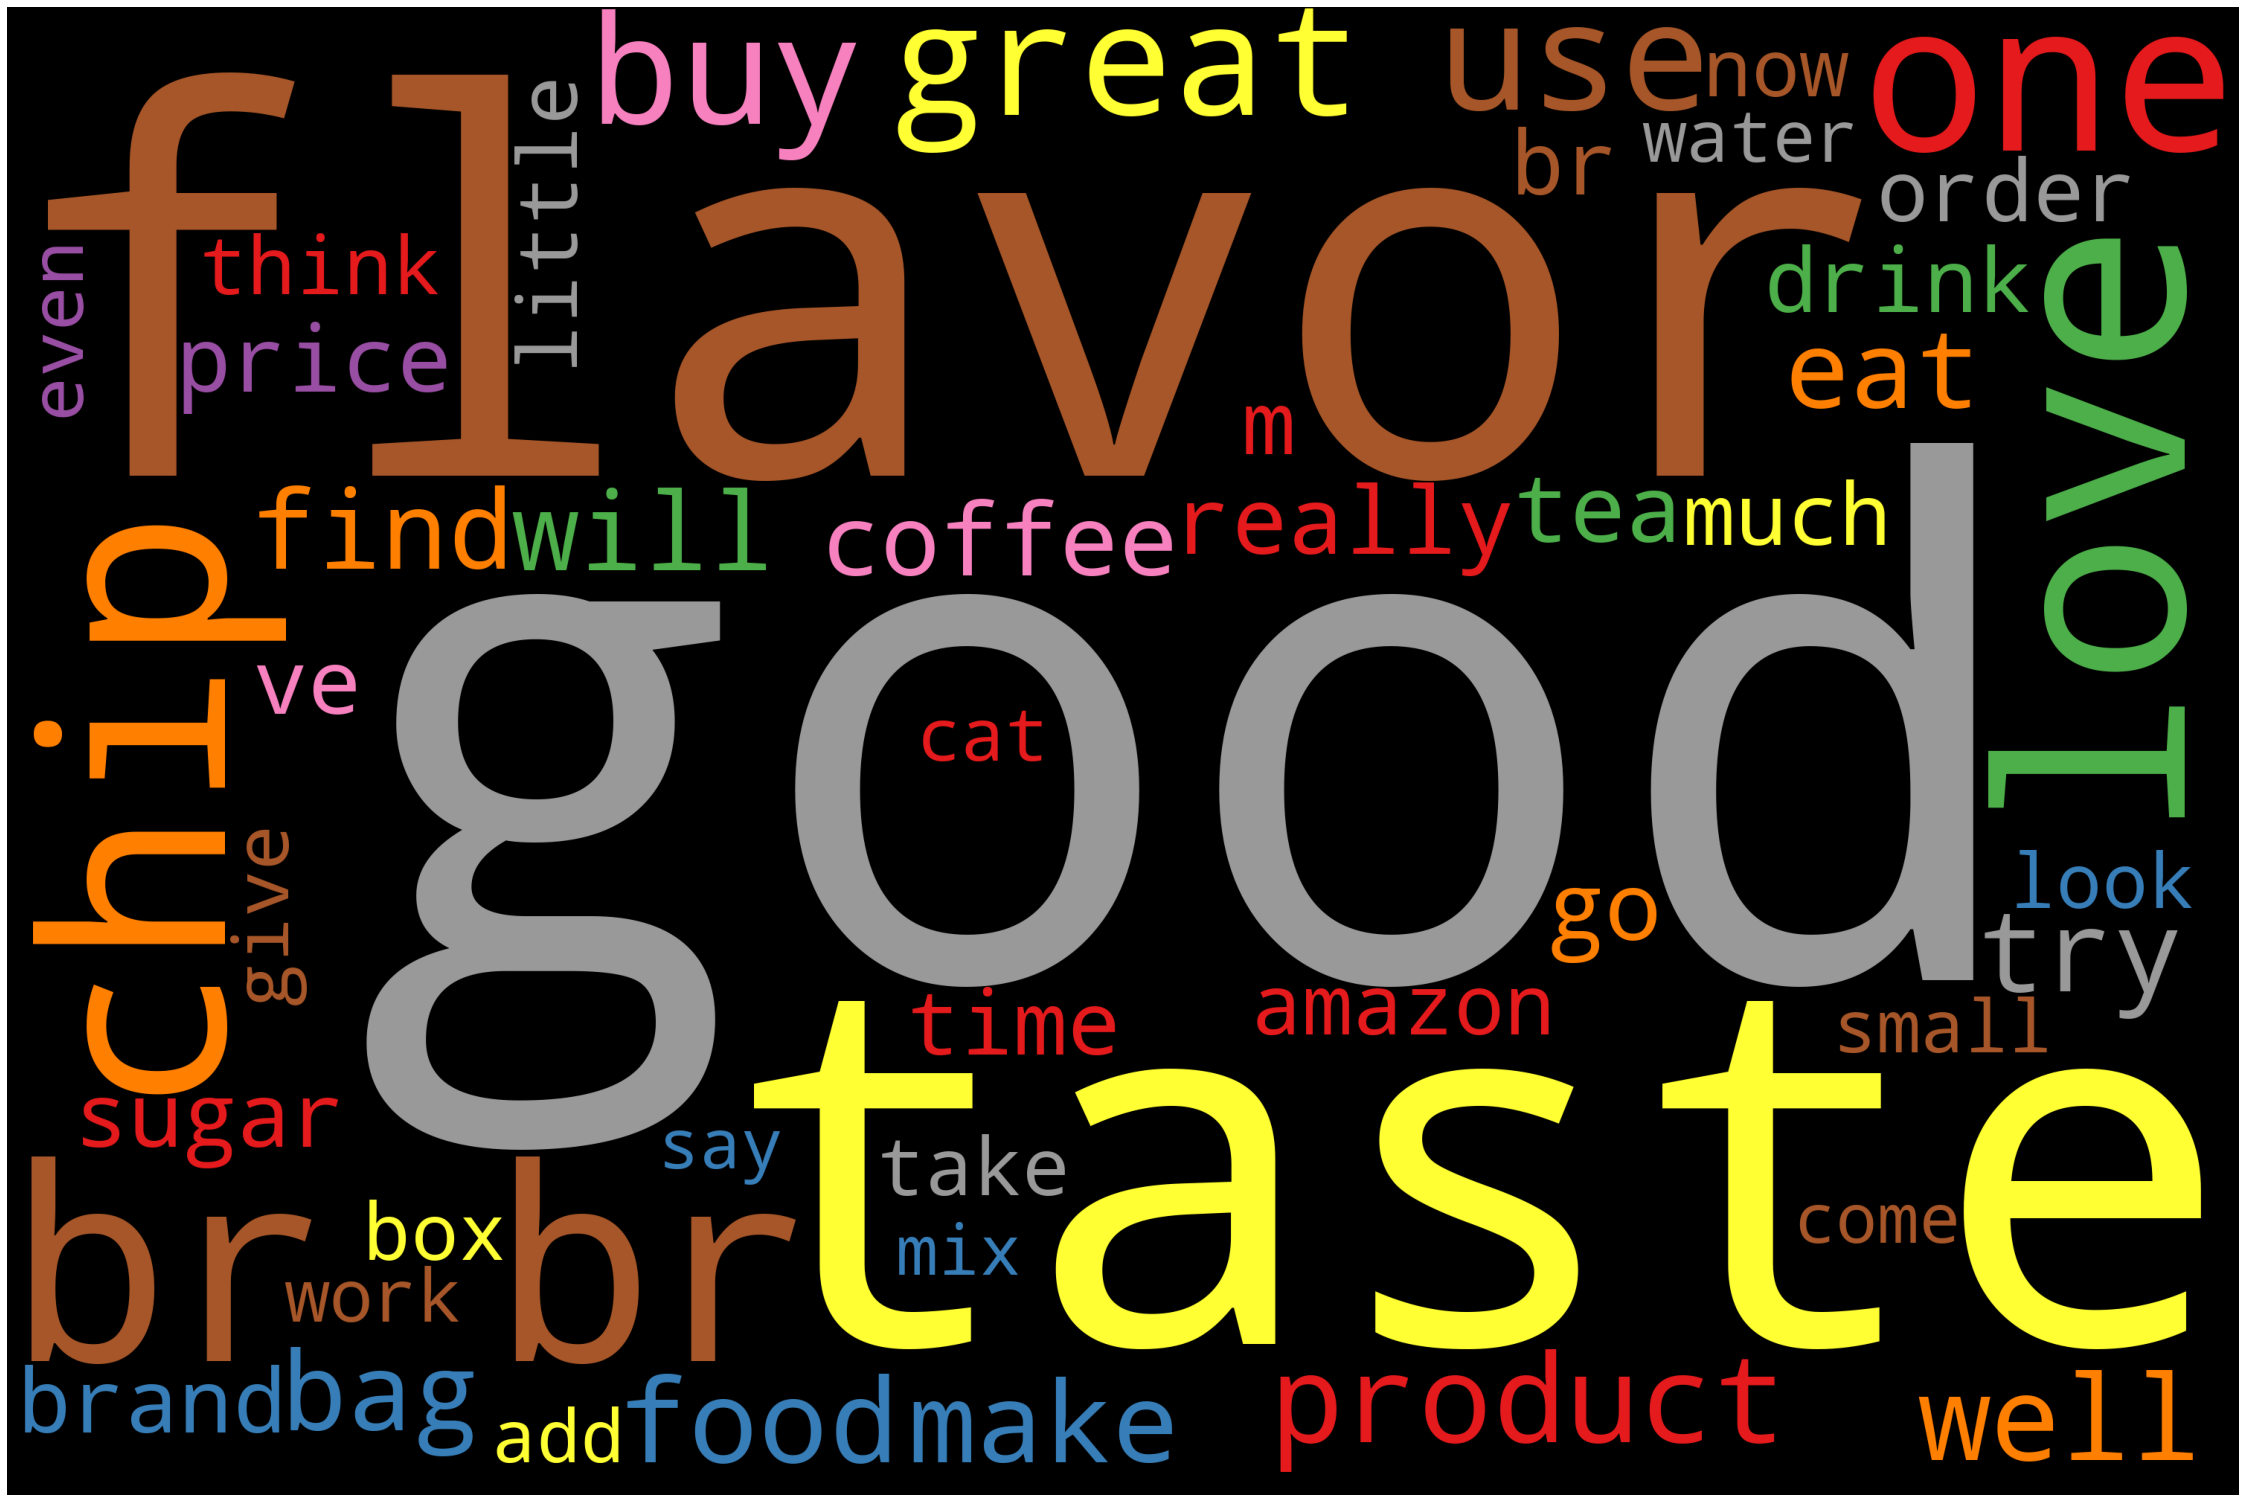

In [45]:
#Plot
plot_cloud(wordcloud)